# 載入套件

In [1]:
!pip install opencv-contrib-python -U

     |████████████████████████████████| 57.4MB 53kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [1]:
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import cv2
import numpy as np
print(cv2.__version__)

4.5.2


# pyDown向下取樣

o.shape= (720, 1080, 3)
r1.shape= (360, 540, 3)
r2.shape= (180, 270, 3)
r3.shape= (90, 135, 3)


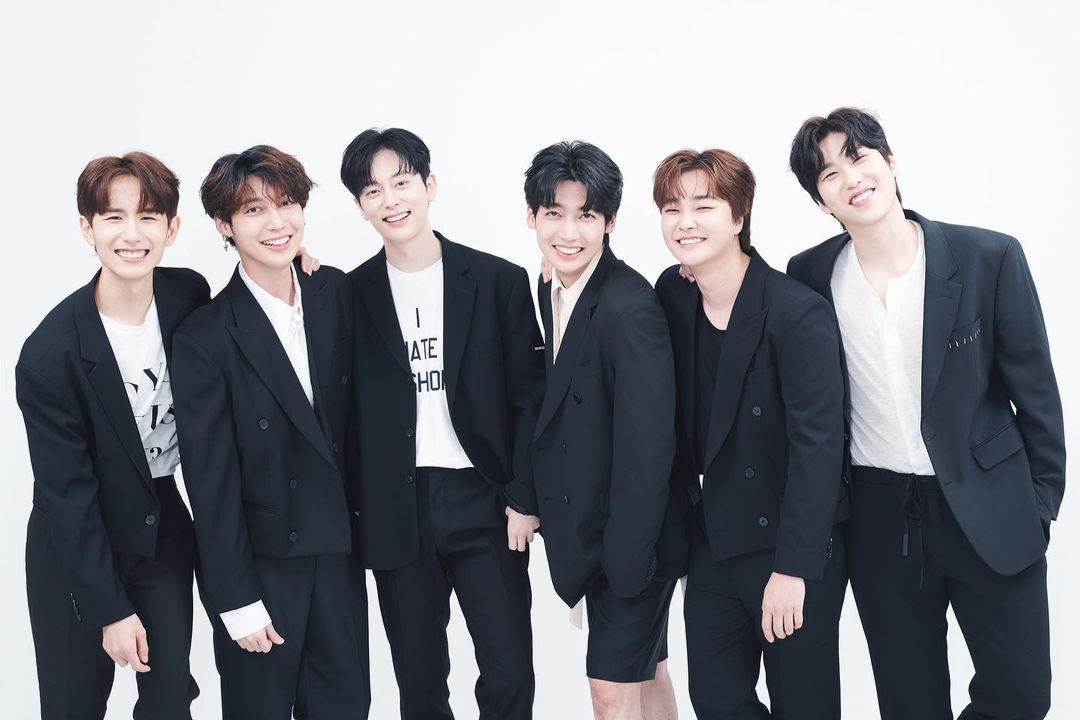

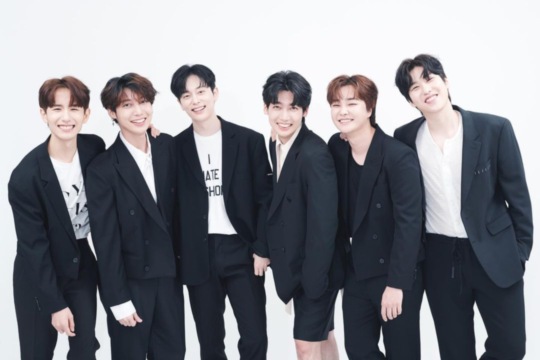

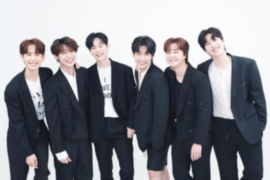

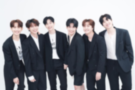

In [4]:
o=cv2.imread("boy.jpg")
r1=cv2.pyrDown(o)
r2=cv2.pyrDown(r1)
r3=cv2.pyrDown(r2)
print("o.shape=",o.shape)
print("r1.shape=",r1.shape)
print("r2.shape=",r2.shape)
print("r3.shape=",r3.shape)
cv2_imshow(o)
cv2_imshow(r1)
cv2_imshow(r2)
cv2_imshow(r3)


# 向上取樣

In [3]:
o=cv2.imread("boy.jpg")
r1=cv2.pyrUp(o)
r2=cv2.pyrUp(r1)
r3=cv2.pyrUp(r2)
print("o.shape=",o.shape)
print("r1.shape=",r1.shape)
print("r2.shape=",r2.shape)
print("r3.shape=",r3.shape)
cv2_imshow(o)
cv2_imshow(r1)
cv2_imshow(r2)
cv2_imshow(r3)


Output hidden; open in https://colab.research.google.com to view.

# 同影像的差值

o.shape= (720, 1080, 3)
diff.shape= (720, 1080, 3)


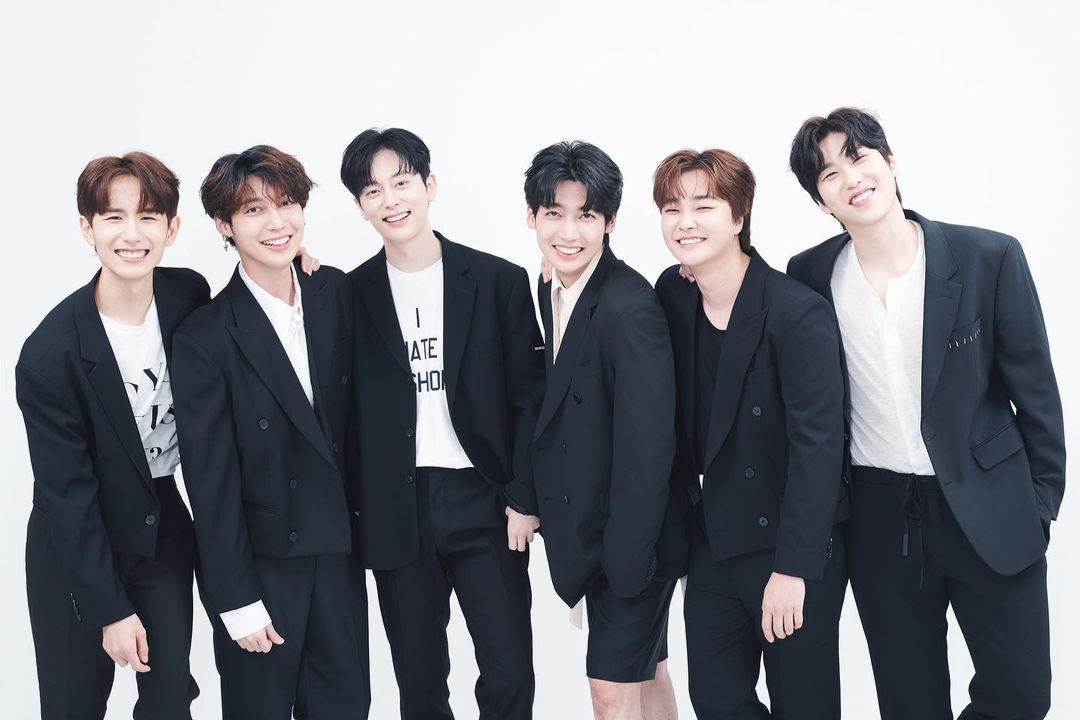

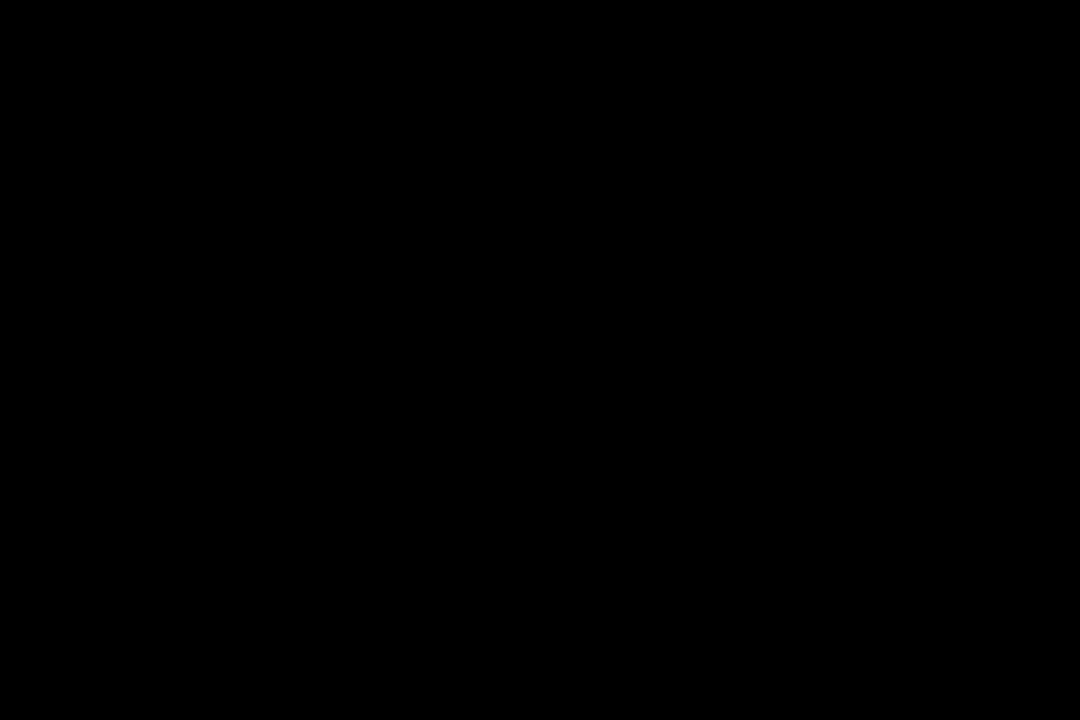

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [5]:
o=cv2.imread("boy.jpg")
diff = o-o   #建置diff影像，檢視up與o的區別
print("o.shape=",o.shape)
print("diff.shape=",diff.shape)
cv2_imshow(o)
cv2_imshow(diff)
print(diff)

# 先向下再向上，比較其差值

o.shape= (720, 1080, 3)
up.shape= (720, 1080, 3)


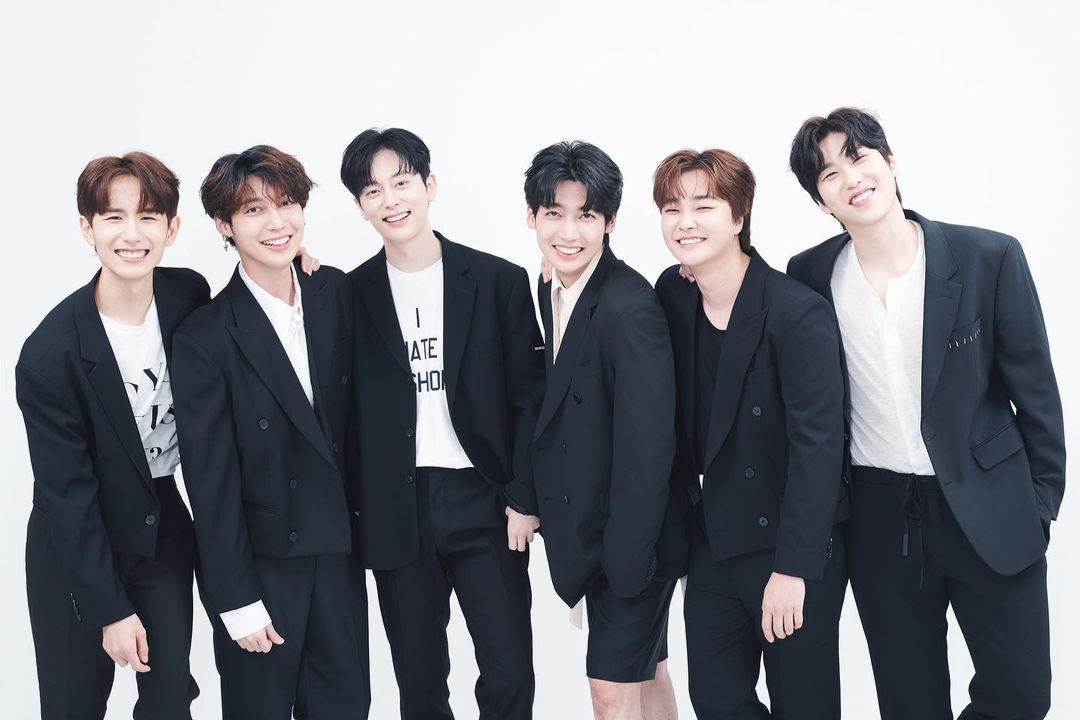

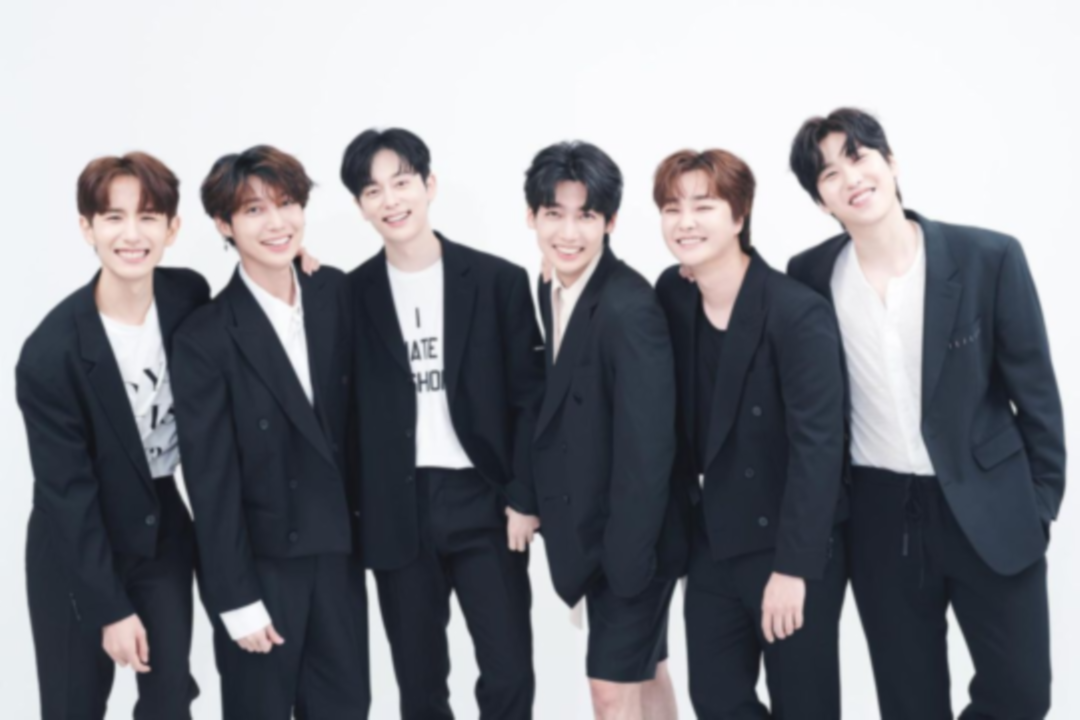

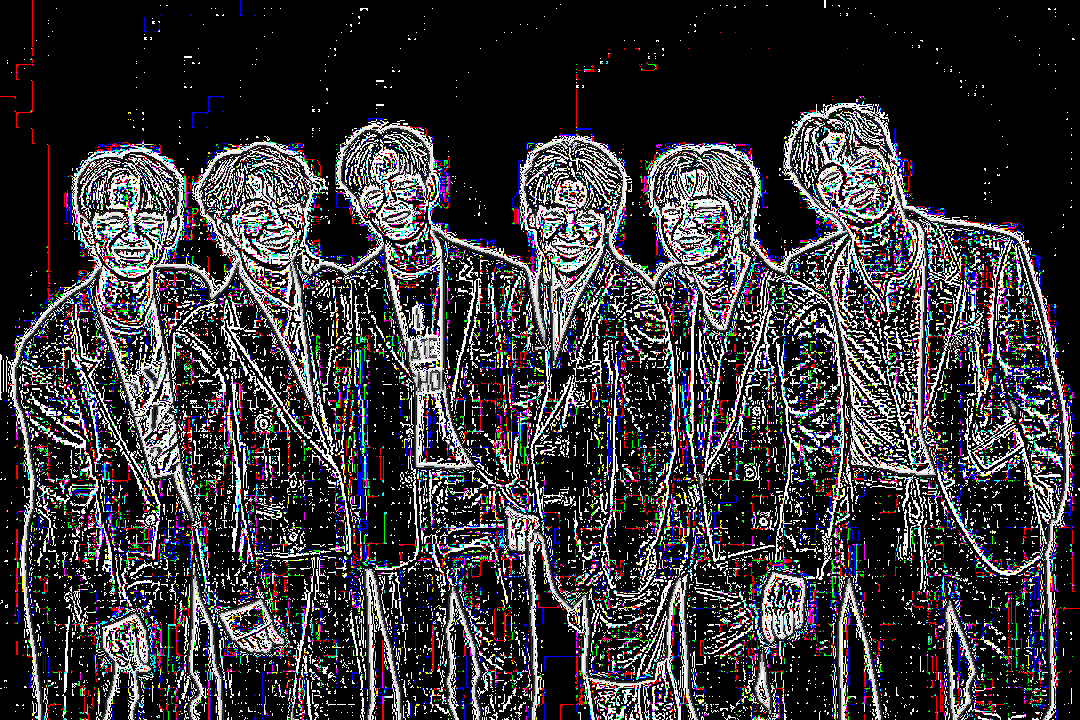

In [6]:
o=cv2.imread("boy.jpg")
down=cv2.pyrDown(o)
up=cv2.pyrUp(down)
diff=up-o   #建置diff影像，檢視up與o的區別
print("o.shape=",o.shape)
print("up.shape=",up.shape)
cv2_imshow(o)
cv2_imshow(up)
cv2_imshow(diff)


# 向上再下，比較差異值

o.shape= (720, 1080, 3)
down.shape= (720, 1080, 3)


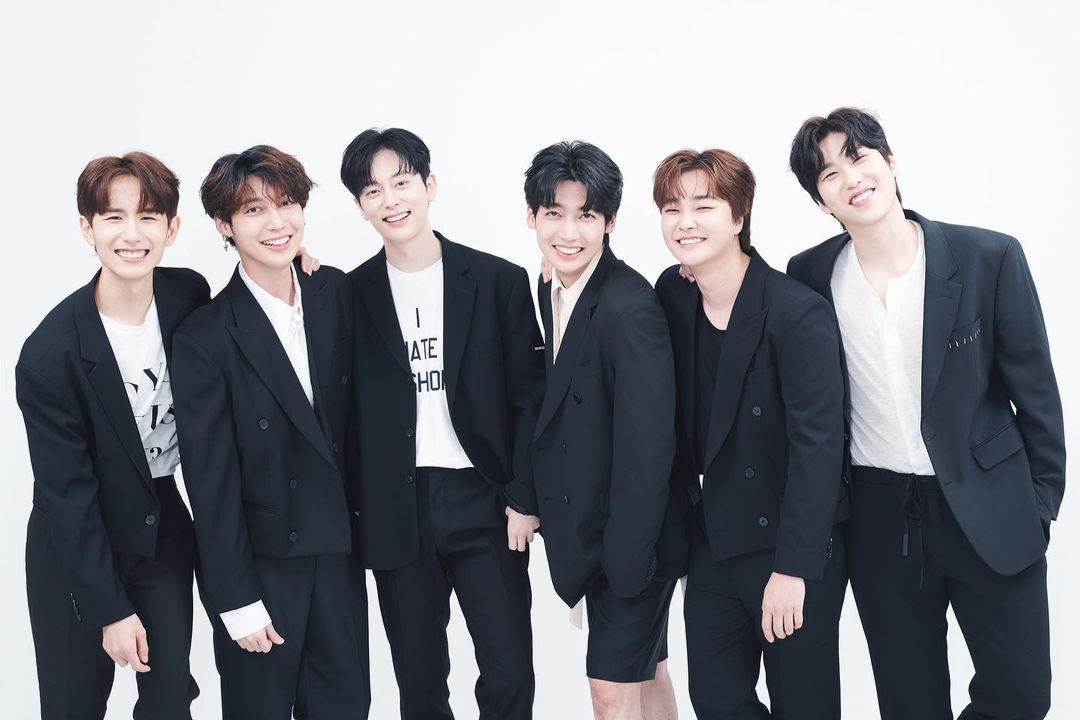

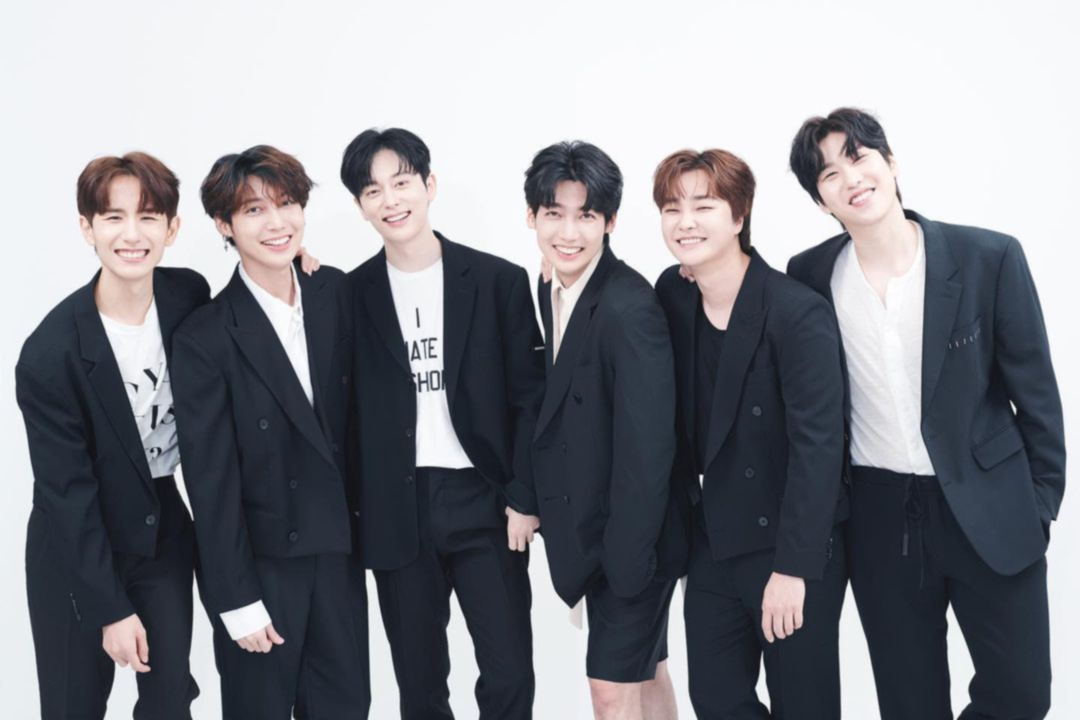

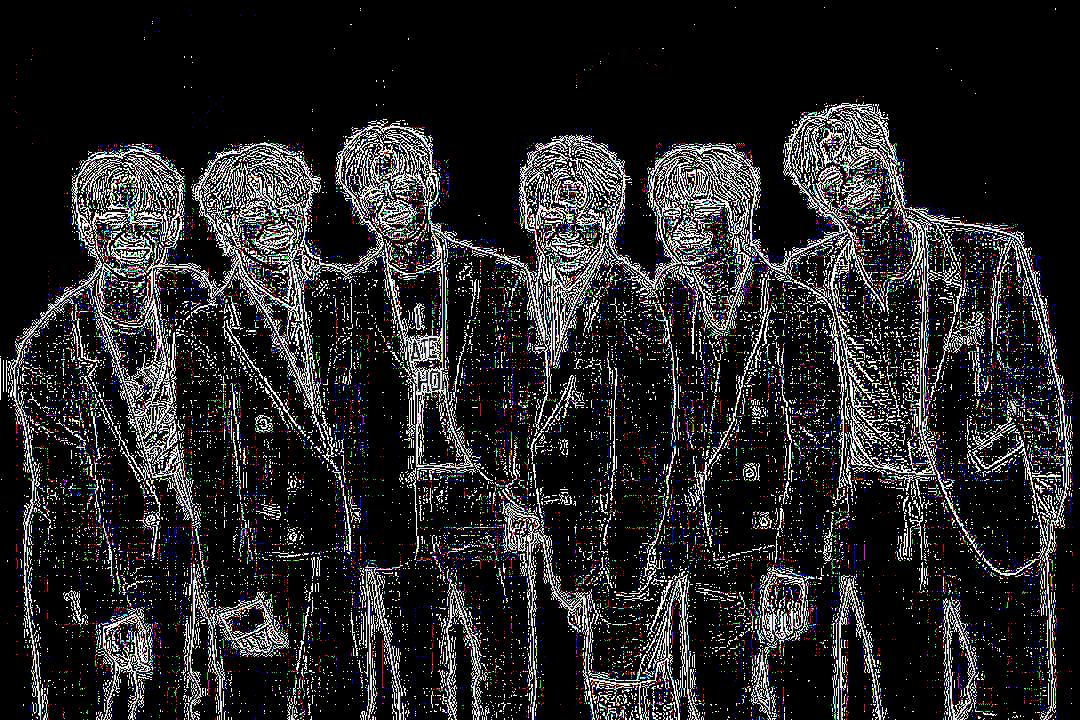

In [7]:
o=cv2.imread("boy.jpg")
up=cv2.pyrUp(o)
down=cv2.pyrDown(up)
diff=down-o 
   #建置diff影像，檢視up與o的區別
print("o.shape=",o.shape)
print("down.shape=",down.shape)
cv2_imshow(o)
cv2_imshow(down)
cv2_imshow(diff)

# 拉普拉斯金字塔

In [8]:
O=cv2.imread("boy.jpg")
G0=O
G1=cv2.pyrDown(G0)
L0=O-cv2.pyrUp(G1)
RO=L0+cv2.pyrUp(G1)  # 透過拉普拉斯影像復原的原始影像

cv2_imshow(G0)
cv2_imshow(G1)
cv2_imshow(L0)
cv2_imshow(RO)

print("O.shape=",O.shape)
print("RO.shape=",RO.shape)
result=RO-O  # 將O和RO做減法運算
cv2_imshow(result)
# 計算result的絕對值，避免求和時負負為正，3+(-3)=0
result=abs(result)  
# 計算result所有元素的和
print("原始影像O與恢復影像RO之差的絕對值和：",np.sum(result))


Output hidden; open in https://colab.research.google.com to view.

In [10]:
import cv2
import numpy as np
O=cv2.imread("boy.jpg")
#==============產生高斯金字塔===================
G0=O
G1=cv2.pyrDown(G0)
G2=cv2.pyrDown(G1)
G3=cv2.pyrDown(G2)
#============產生拉普拉斯金字塔===================
L0=G0-cv2.pyrUp(G1) #拉普拉斯金字塔第0層
L1=G1-cv2.pyrUp(G2) #拉普拉斯金字塔第1層
L2=G2-cv2.pyrUp(G3) #拉普拉斯金字塔第2層
#=================復原G0======================
RG0=L0+cv2.pyrUp(G1)  #透過拉普拉斯影像復原的原始影像G0
print("G0.shape=",G0.shape)
print("RG0.shape=",RG0.shape)
result=RG0-G0  #將RG0和G0相減
#計算result的絕對值，避免求和時負負為正，3+(-3)=0
result=abs(result)  
#計算result所有元素的和
print("原始影像G0與恢復影像RG0差值的絕對值和：",np.sum(result))   
#=================復原G1======================
RG1=L1+cv2.pyrUp(G2) #透過拉普拉斯影像復原G1
print("G1.shape=",G1.shape)
print("RG1.shape=",RG1.shape)
result=RG1-G1  #將RG1和G1相減
print("原始影像G1與恢復影像RG1之差的絕對值和：",np.sum(abs(result)))
#=================復原G2======================
RG2=L2+cv2.pyrUp(G3) #透過拉普拉斯影像復原G2
print("G2.shape=",G2.shape)
print("RG2.shape=",RG2.shape)
result=RG2-G2  #將RG2和G2相減
print("原始影像G2與恢復影像RG2之差的絕對值和：",np.sum(abs(result)))


G0.shape= (720, 1080, 3)
RG0.shape= (720, 1080, 3)
原始影像G0與恢復影像RG0差值的絕對值和： 0
G1.shape= (360, 540, 3)
RG1.shape= (360, 540, 3)
原始影像G1與恢復影像RG1之差的絕對值和： 0
G2.shape= (180, 270, 3)
RG2.shape= (180, 270, 3)
原始影像G2與恢復影像RG2之差的絕對值和： 0
